# It's time for the ANALYSIS!

In [1]:
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# read in the json files
portfolio = pd.read_json('clean_data/portfolio.json')
profile = pd.read_json('clean_data/profile.json')
offers_influence = pd.read_json('clean_data/offers_influence.json')
offers = pd.read_json('clean_data/offers.json')

# Finding customer clusters based on their age, gender and months as user

In [3]:
# Number of row in the profile dataset
profile.shape[0]

17000

In [4]:
# Dropping rows with Null values (I decide to drop them to have a better understanding of the clusters based on the attributes of the user)
not_null_profile = profile.dropna()

In [5]:
# Number of row in the profile dataset without NULL values
not_null_profile.shape[0]

14820

In [6]:
# Minimum sign up year found in the dataset
not_null_profile.sign_up_year.min()

2013

In [7]:
def months_since_2013(year, month):
    "Function to generate the number of months since 2013 for clustering"
    return ((year - 2013) * 12) + month

In [8]:
# Creating months_since_2013 column using the function months_since_2013 to filled it out
not_null_profile['months_since_2013'] = [months_since_2013(row.sign_up_year, row.sign_up_month) for index, row in not_null_profile.iterrows()]

/mnt/c/Users/Kevin/Documents/kevin/starbucks_challenge/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [315]:
# Transactions influenced by offers
len(offers_influence[ (offers_influence.bogo==1) | (offers_influence.informational==1) | (offers_influence.discount==1)]) / len(offers_influence)

0.31874806589278387

In [9]:
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center, random_state=88)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

# Finding not_influenced clusters

In [10]:
not_influenced_amount = offers_influence[(offers_influence.informational==0) & (offers_influence.discount==0) & (offers_influence.bogo==0)].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'not_influenced_amount'})
not_influenced_count = offers_influence[(offers_influence.informational==0) & (offers_influence.discount==0) & (offers_influence.bogo==0)].groupby('person').count().amount.reset_index().rename(columns={'amount': 'not_influenced_count'})

In [11]:
not_influenced_users = not_null_profile[['id']].rename(columns={'id': 'person'})
not_influenced_users = not_influenced_users.merge(not_influenced_amount, on='person')
not_influenced_users = not_influenced_users.merge(not_influenced_count, on='person')
not_influenced_users = not_influenced_users[['person', 'not_influenced_amount', 'not_influenced_count']]

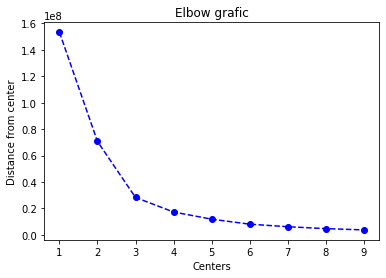

In [12]:
# Finding the correct number of clusters using the elbow grafic
scores = []
centers = list(range(1, 10, 1))

for center in centers:
    scores.append(get_kmeans_score(not_influenced_users[['not_influenced_amount', 'not_influenced_count']], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Centers');
plt.ylabel('Distance from center');
plt.title('Elbow grafic'); 

In [13]:
# Creating the clustering model and predicting the cluster asociated to each user
kmeans = KMeans(n_clusters=4, random_state=88)
model = kmeans.fit(not_influenced_users[['not_influenced_amount', 'not_influenced_count']])
not_influenced_users['cluster'] = model.predict(not_influenced_users[['not_influenced_amount', 'not_influenced_count']])
not_influenced_users = not_influenced_users.merge(not_null_profile, left_on='person', right_on='id')

# not_influenced0


In [14]:
# Getting the users asociated to cluster0
not_influenced0 = not_influenced_users[not_influenced_users.cluster==0]

Printing distribution charts of the important user attributes & the columns used to create the cluster

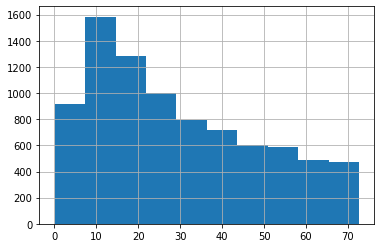

In [15]:
not_influenced0.not_influenced_amount.hist()

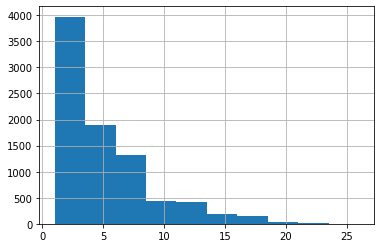

In [16]:
not_influenced0.not_influenced_count.hist()

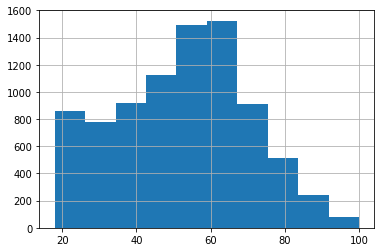

In [17]:
not_influenced0.age.hist()

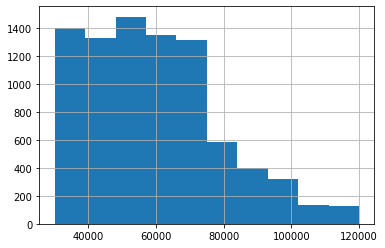

In [18]:
not_influenced0.income.hist()

In [19]:
print('M:', np.sum(not_influenced0['M']==1))
print('F:', np.sum(not_influenced0['F']==1))
print('O:', np.sum(not_influenced0['O']==1))

M: 5493
F: 2839
O: 117


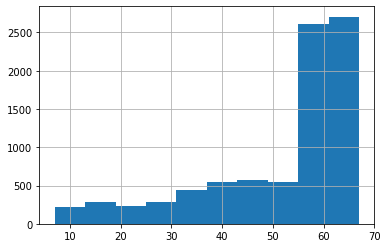

In [20]:
not_influenced0.months_since_2013.hist()

# not_influenced1

In [21]:
# Getting the users asociated to cluster1
not_influenced1 = not_influenced_users[not_influenced_users.cluster==1]

Printing distribution charts of the important user attributes & the columns used to create the cluster

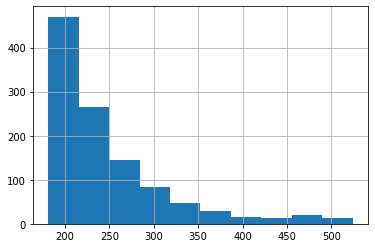

In [22]:
not_influenced1.not_influenced_amount.hist()

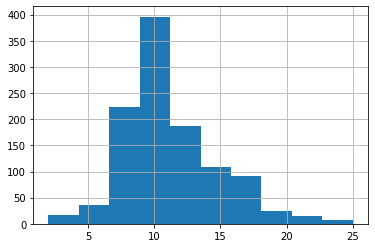

In [23]:
not_influenced1.not_influenced_count.hist()

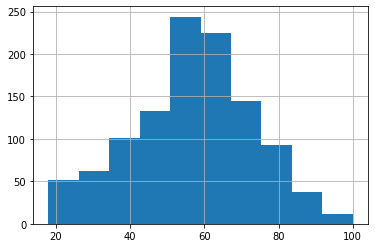

In [24]:
not_influenced1.age.hist()

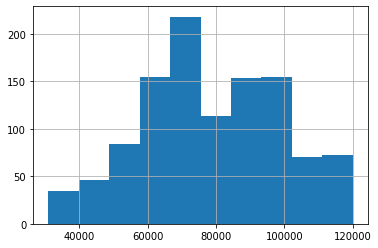

In [25]:
not_influenced1.income.hist()

In [26]:
print('M:', np.sum(not_influenced1['M']==1))
print('F:', np.sum(not_influenced1['F']==1))
print('O:', np.sum(not_influenced1['O']==1))

M: 486
F: 596
O: 21


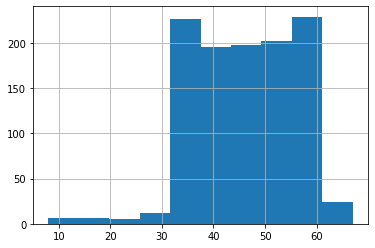

In [27]:
not_influenced1.months_since_2013.hist()

# not_influenced2


In [28]:
# Getting the users asociated to cluster2
not_influenced2 = not_influenced_users[not_influenced_users.cluster==2]

Printing distribution charts of the important user attributes & the columns used to create the cluster

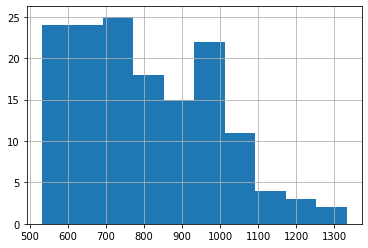

In [29]:
not_influenced2.not_influenced_amount.hist()

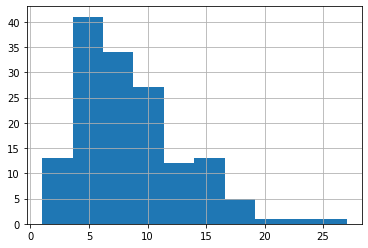

In [30]:
not_influenced2.not_influenced_count.hist()

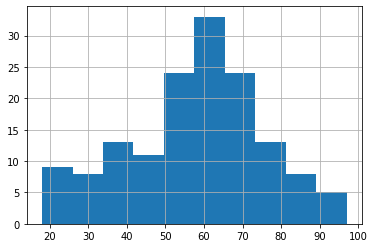

In [31]:
not_influenced2.age.hist()

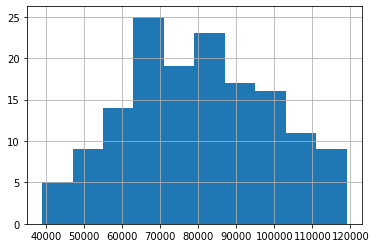

In [32]:
not_influenced2.income.hist()

In [33]:
print('M:', np.sum(not_influenced2['M']==1))
print('F:', np.sum(not_influenced2['F']==1))
print('O:', np.sum(not_influenced2['O']==1))

M: 70
F: 77
O: 1


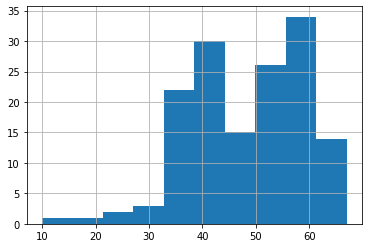

In [34]:
not_influenced2.months_since_2013.hist()

# not_influenced3

In [35]:
# Getting the users asociated to cluster3
not_influenced3 = not_influenced_users[not_influenced_users.cluster==3]

Printing distribution charts of the important user attributes & the columns used to create the cluster

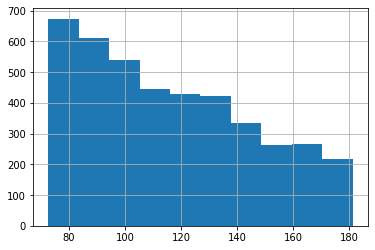

In [36]:
not_influenced3.not_influenced_amount.hist()

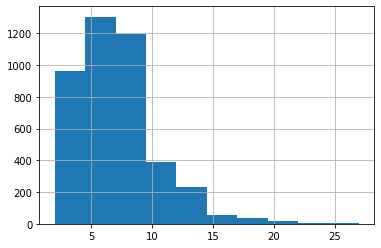

In [37]:
not_influenced3.not_influenced_count.hist()

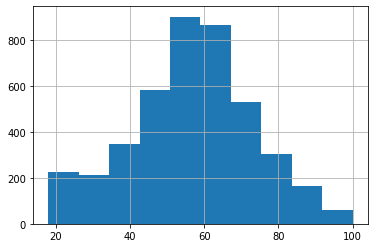

In [38]:
not_influenced3.age.hist()

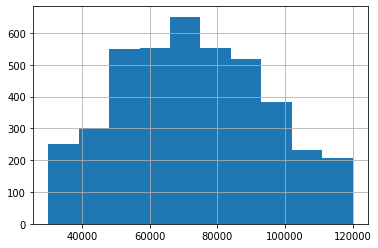

In [39]:
not_influenced3.income.hist()

In [40]:
print('M:', np.sum(not_influenced3['M']==1))
print('F:', np.sum(not_influenced3['F']==1))
print('O:', np.sum(not_influenced3['O']==1))

M: 1941
F: 2204
O: 58


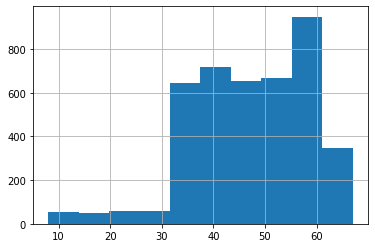

In [41]:
not_influenced3.months_since_2013.hist()

In [310]:
# percentage of Users that don't need offers
len(not_influenced_users[(not_influenced_users.cluster==1) | (not_influenced_users.cluster==2)]) / len(not_influenced_users) 

0.08998057973099331

## Clustering conclusion for Not motivated purchases

There are 4 clusters:

Cluster 0: People that have spent less than 70 & have done just a few purchases

Cluster 1: People that have spent more than 200 & have done aprox. like 10 purchases

Cluster 2: People that have spent more than 500 

Cluster 3: People that have spent between 80 & 180 & have done less than 10 purchases.

We are going to focus the next analysis just for the users found in the clusters 0 & 3, because the other ones don´t need offers to buy.

In [42]:
# Keeping just the users that need the offers for the analysis
low_users = not_influenced_users[(not_influenced_users.cluster==0) | (not_influenced_users.cluster==3)]

# Finding BOGO clusters

In [44]:
bogo_amount = offers_influence[offers_influence.bogo==1].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'bogo_amount'})
bogo_count = offers_influence[offers_influence.bogo==1].groupby('person').count().bogo.reset_index().rename(columns={'bogo': 'bogo_count'})
bogo_received =  offers[offers.bogo==1].groupby('person').count().bogo.reset_index().rename(columns={'bogo': 'bogo_received'})
bogo_viewed =  offers[(offers.bogo==1) & (~offers.viewed_time.isnull())].groupby('person').count().bogo.reset_index().rename(columns={'bogo': 'bogo_viewed'})
bogo_completed =  offers[(offers.bogo==1) & (~offers.completed_time.isnull())].groupby('person').count().bogo.reset_index().rename(columns={'bogo': 'bogo_completed'})

In [110]:
# Creating the bogo users dataset
bogo_users = low_users.copy()
bogo_users = bogo_users.merge(bogo_amount, on='person', how='left')
bogo_users = bogo_users.merge(bogo_count, on='person', how='left')
bogo_users = bogo_users.merge(bogo_received, on='person', how='left')
bogo_users = bogo_users.merge(bogo_viewed, on='person', how='left')
bogo_users = bogo_users.merge(bogo_completed, on='person', how='left')
bogo_users['viewed_ratio'] = [row.bogo_viewed/row.bogo_received for index, row in bogo_users.iterrows()]
bogo_users['completed_ratio'] = [row.bogo_completed/row.bogo_received for index, row in bogo_users.iterrows()]
bogo_users['motivation_ratio'] = [row.bogo_count/row.bogo_received for index, row in bogo_users.iterrows()]
bogo_users = bogo_users[['person', 'viewed_ratio', 'completed_ratio', 'motivation_ratio']]
bogo_users.fillna(0, inplace=True)

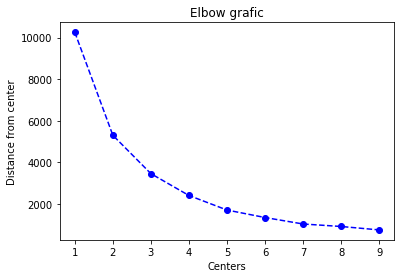

In [111]:
# Checking the correct number of clusters using the elbow grafic
scores = []
centers = list(range(1, 10, 1))

for center in centers:
    scores.append(get_kmeans_score(bogo_users[['viewed_ratio', 'completed_ratio', 'motivation_ratio']], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Centers');
plt.ylabel('Distance from center');
plt.title('Elbow grafic'); 

In [112]:
# Creating kmeans model for clustering and predicting the cluster for every user
kmeans = KMeans(n_clusters=4, random_state=88)
model = kmeans.fit(bogo_users[['viewed_ratio', 'completed_ratio', 'motivation_ratio']])
bogo_users['cluster'] = model.predict(bogo_users[['viewed_ratio', 'completed_ratio', 'motivation_ratio']])

In [113]:
bogo_users = bogo_users.merge(not_null_profile, left_on='person', right_on='id')

# BOGO0

In [114]:
# Getting BOGO cluster and printing the distribution charts asociated
bogo0 = bogo_users[bogo_users.cluster==0]

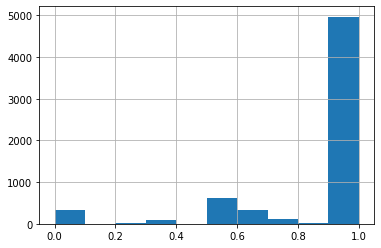

In [115]:
bogo0.viewed_ratio.hist()

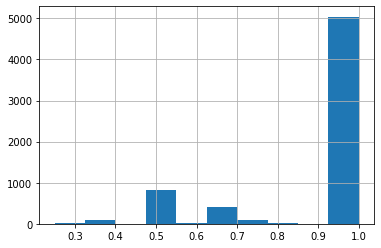

In [116]:
bogo0.completed_ratio.hist()

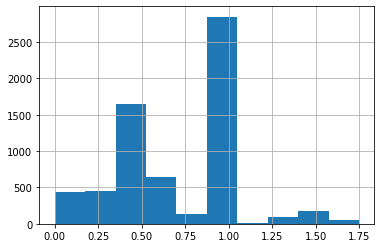

In [117]:
bogo0.motivation_ratio.hist()

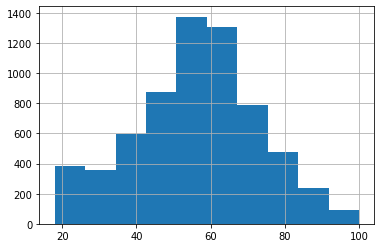

In [118]:
bogo0.age.hist()

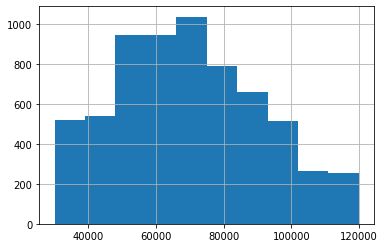

In [119]:
bogo0.income.hist()

In [120]:
print('M:', np.sum(bogo0['M']==1))
print('F:', np.sum(bogo0['F']==1))
print('O:', np.sum(bogo0['O']==1))

M: 3247
F: 3137
O: 105


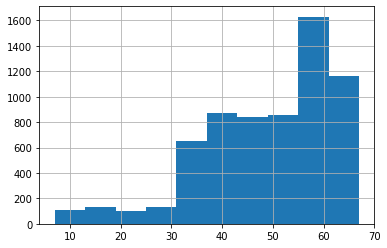

In [121]:
bogo0.months_since_2013.hist()

# BOGO1

In [122]:
# Getting BOGO cluster and printing the distribution charts asociated
bogo1 = bogo_users[bogo_users.cluster==1]

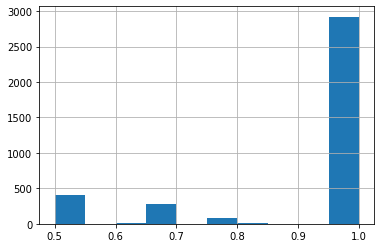

In [123]:
bogo1.viewed_ratio.hist()

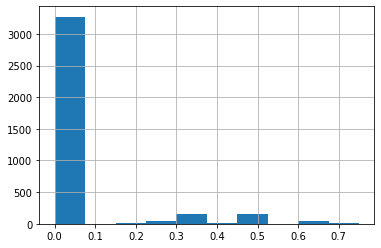

In [124]:
bogo1.completed_ratio.hist()

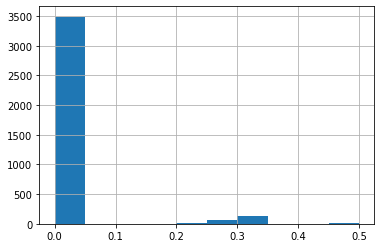

In [125]:
bogo1.motivation_ratio.hist()

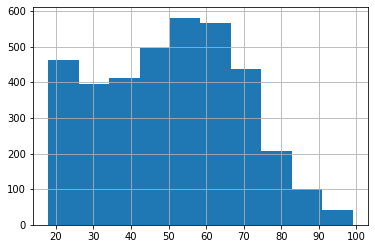

In [126]:
bogo1.age.hist()

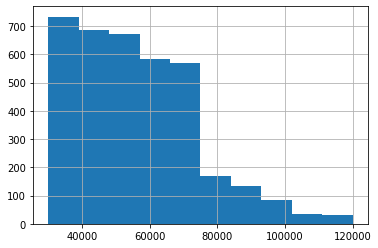

In [127]:
bogo1.income.hist()

In [128]:
print('M:', np.sum(bogo1['M']==1))
print('F:', np.sum(bogo1['F']==1))
print('O:', np.sum(bogo1['O']==1))

M: 2672
F: 991
O: 35


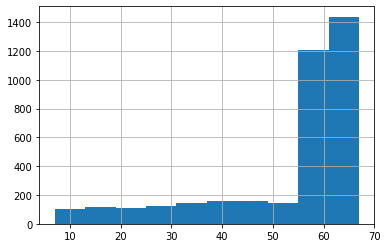

In [129]:
bogo1.months_since_2013.hist()

# BOGO2

In [130]:
# Getting BOGO cluster and printing the distribution charts asociated
bogo2 = bogo_users[bogo_users.cluster==2]

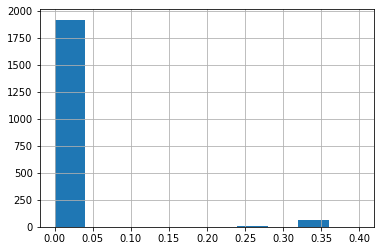

In [131]:
bogo2.viewed_ratio.hist()

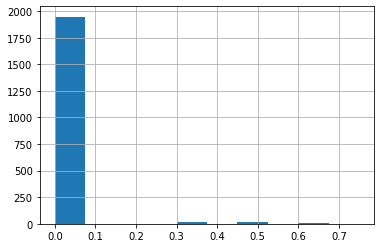

In [132]:
bogo2.completed_ratio.hist()

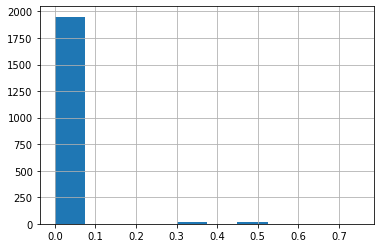

In [133]:
bogo2.motivation_ratio.hist()

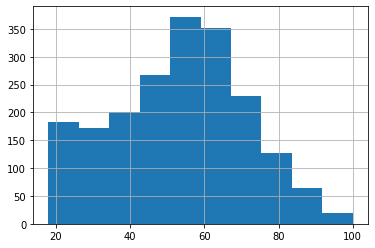

In [134]:
bogo2.age.hist()

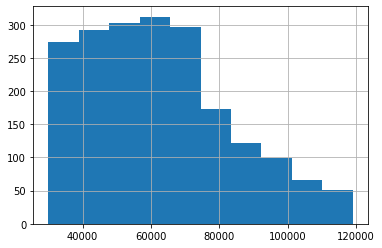

In [135]:
bogo2.income.hist()

In [136]:
print('M:', np.sum(bogo2['M']==1))
print('F:', np.sum(bogo2['F']==1))
print('O:', np.sum(bogo2['O']==1))

M: 1201
F: 753
O: 33


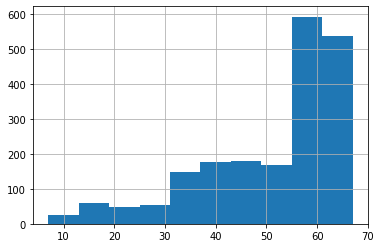

In [137]:
bogo2.months_since_2013.hist()

# BOGO3

In [138]:
# Getting BOGO cluster and printing the distribution charts asociated
bogo3 = bogo_users[bogo_users.cluster==3]

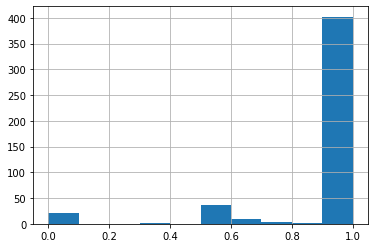

In [139]:
bogo3.viewed_ratio.hist()

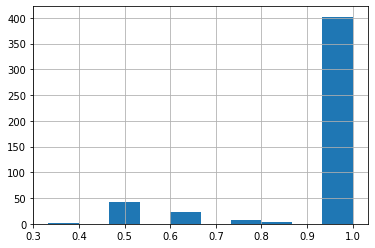

In [140]:
bogo3.completed_ratio.hist()

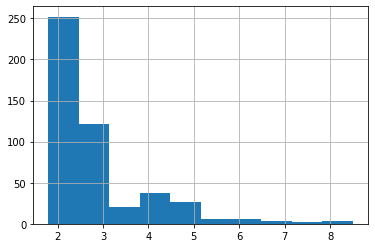

In [141]:
bogo3.motivation_ratio.hist()

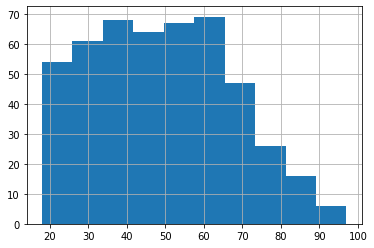

In [142]:
bogo3.age.hist()

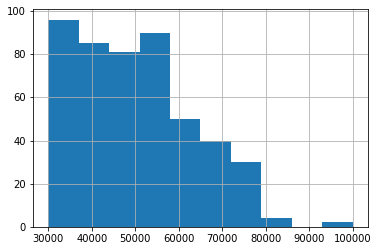

In [143]:
bogo3.income.hist()

In [144]:
print('M:', np.sum(bogo3['M']==1))
print('F:', np.sum(bogo3['F']==1))
print('O:', np.sum(bogo3['O']==1))

M: 314
F: 162
O: 2


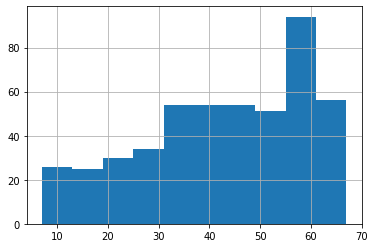

In [145]:
bogo3.months_since_2013.hist()

In [148]:
# Checking the number of females and males
bogo_users[bogo_users.F==1].person.count(),  bogo_users[bogo_users.M==1].person.count()

(5043, 7434)

In [317]:
# Percentage of users that complete the offer
(np.sum(bogo_users.cluster==0) + np.sum(bogo_users.cluster==3) )/ len(bogo_users)

0.5506639266519128

## Clustering conclusion for BOGO offers

There are 4 clusters:

Cluster 0: People who know about the offer and complete it with 1 purchase.

Cluster 1: People who know about the offer but it didn't motivate them to buy. (Most of them are males)

Cluster 2: People who don't even know about their offer.

Cluster 3: People who know about the offer and complete it with more than 1 purchase.


These clusters shows us that men are more likely not to use this kind of coupons!!

# Finding informational clusters

In [149]:
informational_amount = offers_influence[offers_influence.informational==1].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'informational_amount'})
informational_count = offers_influence[offers_influence.informational==1].groupby('person').count().informational.reset_index().rename(columns={'informational': 'informational_count'})
informational_received =  offers[offers.informational==1].groupby('person').count().informational.reset_index().rename(columns={'informational': 'informational_received'})
informational_viewed =  offers[(offers.informational==1) & (~offers.viewed_time.isnull())].groupby('person').count().informational.reset_index().rename(columns={'informational': 'informational_viewed'})

In [179]:
informational_users = low_users.copy()
informational_users = informational_users.merge(informational_amount, on='person', how='left')
informational_users = informational_users.merge(informational_count, on='person', how='left')
informational_users = informational_users.merge(informational_received, on='person', how='left')
informational_users = informational_users.merge(informational_viewed, on='person', how='left')
informational_users['viewed_ratio'] = [row.informational_viewed/row.informational_received for index, row in informational_users.iterrows()]
informational_users['amount_ratio'] = [row.informational_amount/row.informational_viewed for index, row in informational_users.iterrows()]
informational_users['motivation_ratio'] = [row.informational_count/row.informational_received for index, row in informational_users.iterrows()]
informational_users = informational_users[['person', 'viewed_ratio', 'amount_ratio', 'motivation_ratio']]
informational_users.fillna(0, inplace=True)

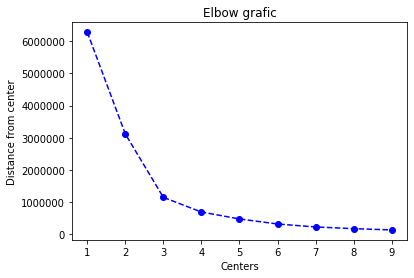

In [180]:
# Finding the number of clusters using elbow grafic
scores = []
centers = list(range(1, 10, 1))

for center in centers:
    scores.append(get_kmeans_score(informational_users[['viewed_ratio', 'amount_ratio', 'motivation_ratio']], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Centers');
plt.ylabel('Distance from center');
plt.title('Elbow grafic'); 

In [181]:
# Creating clusters using kmeans
kmeans = KMeans(n_clusters=3, random_state=88)
model = kmeans.fit(informational_users[['viewed_ratio', 'amount_ratio', 'motivation_ratio']])
informational_users['cluster'] = model.predict(informational_users[['viewed_ratio', 'amount_ratio', 'motivation_ratio']])

informational_users = informational_users.merge(not_null_profile, left_on='person', right_on='id')

# informational0

In [182]:
# Getting informational cluster and printing the distributon charts associated
informational0 = informational_users[informational_users.cluster==0]

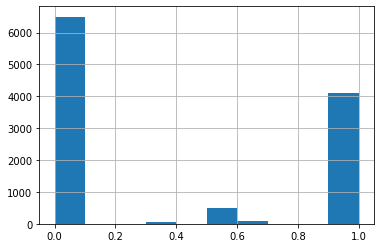

In [183]:
informational0.viewed_ratio.hist()

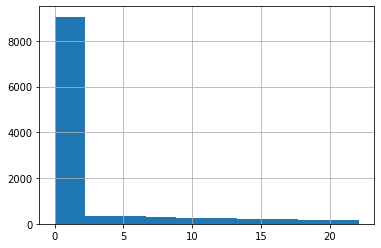

In [184]:
informational0.amount_ratio.hist()

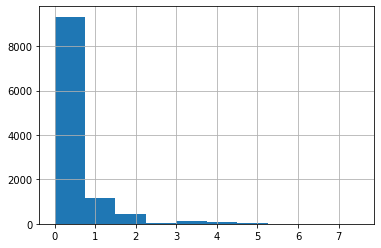

In [185]:
informational0.motivation_ratio.hist()

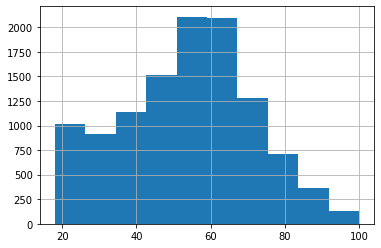

In [186]:
informational0.age.hist()

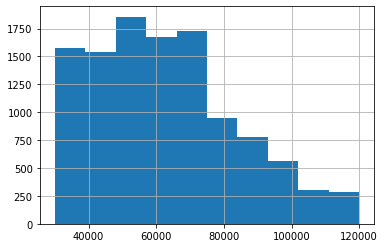

In [187]:
informational0.income.hist()

In [188]:
print('M:', np.sum(informational0['M']==1))
print('F:', np.sum(informational0['F']==1))
print('O:', np.sum(informational0['O']==1))

M: 6767
F: 4340
O: 150


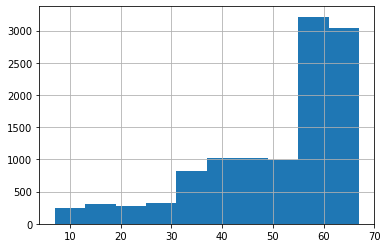

In [189]:
informational0.months_since_2013.hist()

# informational1

In [190]:
# Getting informational cluster and printing the distributon charts associated
informational1 = informational_users[informational_users.cluster==1]

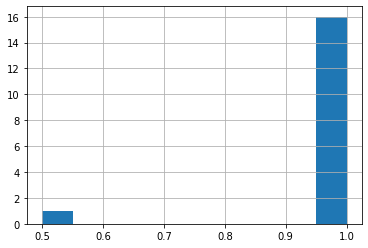

In [191]:
informational1.viewed_ratio.hist()

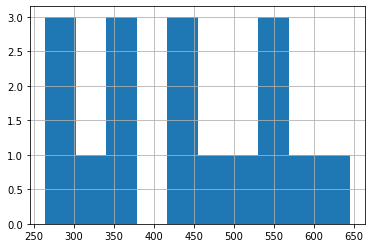

In [192]:
informational1.amount_ratio.hist()

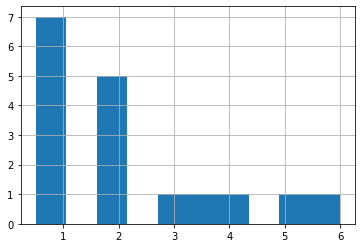

In [193]:
informational1.motivation_ratio.hist()

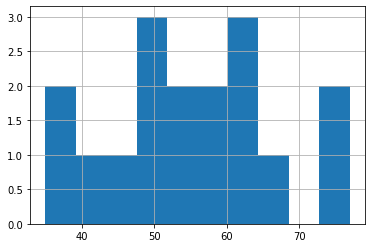

In [194]:
informational1.age.hist()

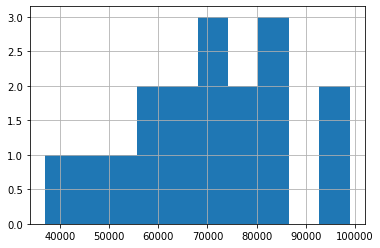

In [195]:
informational1.income.hist()

In [196]:
print('M:', np.sum(informational1['M']==1))
print('F:', np.sum(informational1['F']==1))
print('O:', np.sum(informational1['O']==1))

M: 10
F: 6
O: 1


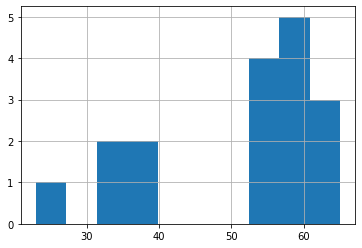

In [197]:
informational1.months_since_2013.hist()

# informational2

In [198]:
# Getting informational cluster and printing the distributon charts associated
informational2 = informational_users[informational_users.cluster==2]

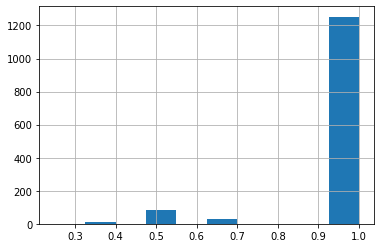

In [199]:
informational2.viewed_ratio.hist()

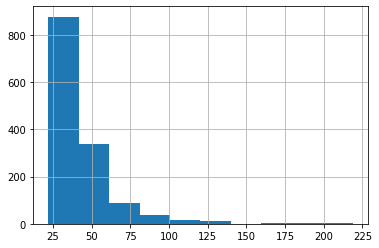

In [200]:
informational2.amount_ratio.hist()

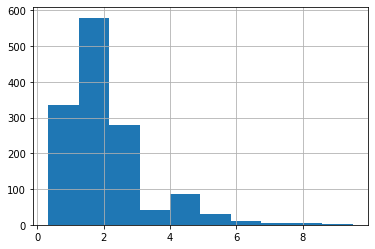

In [201]:
informational2.motivation_ratio.hist()

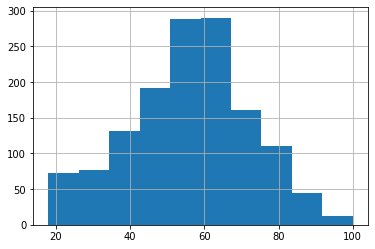

In [202]:
informational2.age.hist()

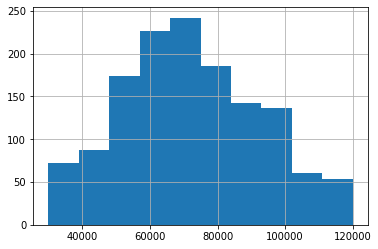

In [203]:
informational2.income.hist()

In [204]:
print('M:', np.sum(informational2['M']==1))
print('F:', np.sum(informational2['F']==1))
print('O:', np.sum(informational2['O']==1))

M: 657
F: 697
O: 24


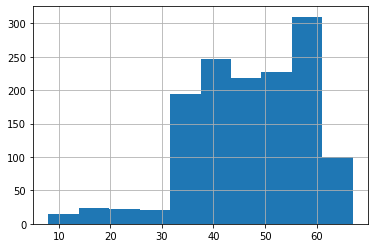

In [205]:
informational2.months_since_2013.hist()

In [207]:
# Checking the number of users in cluster 0 (Users that dont buy anything)
np.sum(informational_users.cluster==0)/len(informational_users)

0.8897407524502055

## Clustering conclusion for informational offers

There are 3 clusters:

Cluster 0: People who don't see the offer or people who don't buy even knowing about their offer.

Cluster 1: People who know about the offer and buy a lot (more than 250)

Cluster 2: People who know about the offer and spent between 25 and 70.

Sadly 89% of the users are located in cluster 0. That means that this kind of offers has a very very low impact in the users.

# Finding discount clusters

In [246]:
discount_amount = offers_influence[offers_influence.discount==1].groupby('person').sum().amount.reset_index().rename(columns={'amount': 'discount_amount'})
discount_count = offers_influence[offers_influence.discount==1].groupby('person').count().discount.reset_index().rename(columns={'discount': 'discount_count'})
discount_received =  offers[offers.discount==1].groupby('person').count().discount.reset_index().rename(columns={'discount': 'discount_received'})
discount_viewed =  offers[(offers.discount==1) & (~offers.viewed_time.isnull())].groupby('person').count().discount.reset_index().rename(columns={'discount': 'discount_viewed'})
discount_completed =  offers[(offers.discount==1) & (~offers.viewed_time.isnull()) & (~offers.completed_time.isnull())].groupby('person').count().discount.reset_index().rename(columns={'discount': 'discount_completed'})

discount_users = low_users.copy()
discount_users = discount_users.merge(discount_amount, on='person', how='left')
discount_users = discount_users.merge(discount_count, on='person', how='left')
discount_users = discount_users.merge(discount_received, on='person', how='left')
discount_users = discount_users.merge(discount_viewed, on='person', how='left')
discount_users = discount_users.merge(discount_completed, on='person', how='left')
discount_users['viewed_ratio'] = [row.discount_viewed/row.discount_received for index, row in discount_users.iterrows()]
discount_users['completed_ratio'] = [row.discount_completed/row.discount_viewed for index, row in discount_users.iterrows()]
discount_users['motivation_ratio'] = [row.discount_count/row.discount_viewed for index, row in discount_users.iterrows()]
discount_users = discount_users[['person', 'viewed_ratio', 'completed_ratio', 'motivation_ratio']]
discount_users.fillna(0, inplace=True)

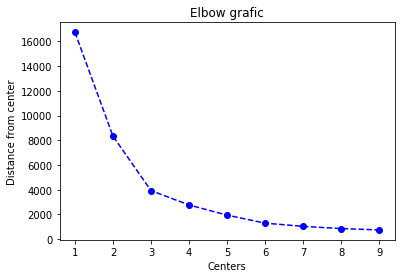

In [247]:
# Obtaining the correct number of clusters to use for discounts
scores = []
centers = list(range(1, 10, 1))

for center in centers:
    scores.append(get_kmeans_score(discount_users[['viewed_ratio', 'completed_ratio', 'motivation_ratio']], center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Centers');
plt.ylabel('Distance from center');
plt.title('Elbow grafic'); 

In [248]:
# Creating the kmeans model to predict the clusters
kmeans = KMeans(n_clusters=4, random_state=88)
model = kmeans.fit(discount_users[['viewed_ratio', 'completed_ratio', 'motivation_ratio']])
discount_users['cluster'] = model.predict(discount_users[['viewed_ratio', 'completed_ratio', 'motivation_ratio']])

discount_users = discount_users.merge(not_null_profile, left_on='person', right_on='id')


# discount0


In [249]:
# Getting the dataframe asociated to the cluster and printing his distribution chart
discount0 = discount_users[discount_users.cluster==0]

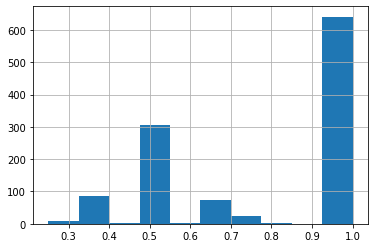

In [250]:
discount0.viewed_ratio.hist()

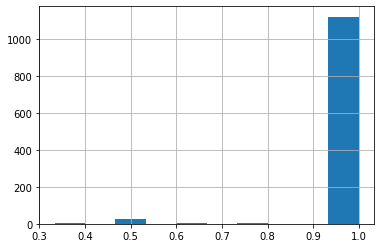

In [251]:
discount0.completed_ratio.hist()

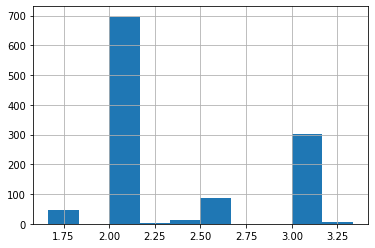

In [303]:
discount0.motivation_ratio.hist()

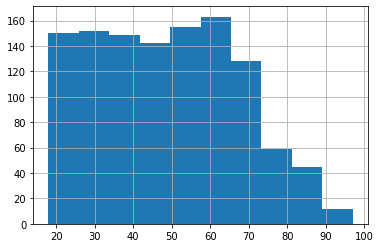

In [253]:
discount0.age.hist()

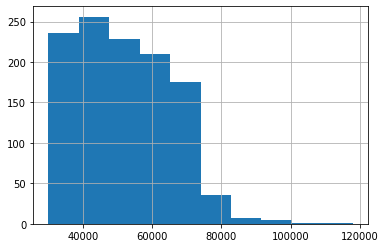

In [254]:
discount0.income.hist()

In [255]:
print('M:', np.sum(discount0['M']==1))
print('F:', np.sum(discount0['F']==1))
print('O:', np.sum(discount0['O']==1))

M: 811
F: 329
O: 15


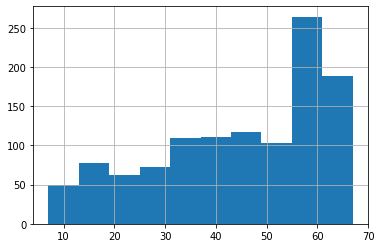

In [256]:
discount0.months_since_2013.hist()

# discount1

In [257]:
# Getting the dataframe asociated to the cluster and printing his distribution chart
discount1 = discount_users[discount_users.cluster==1]

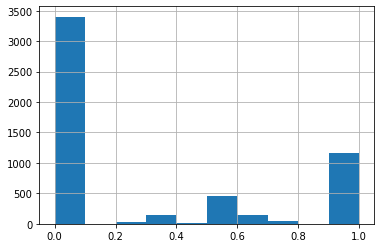

In [258]:
discount1.viewed_ratio.hist()

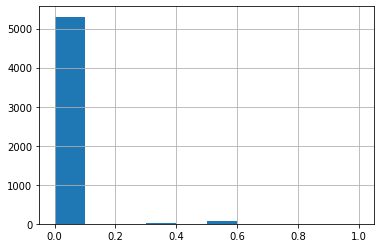

In [259]:
discount1.completed_ratio.hist()

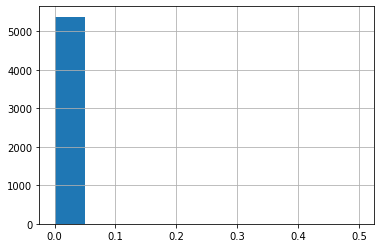

In [260]:
discount1.motivation_ratio.hist()

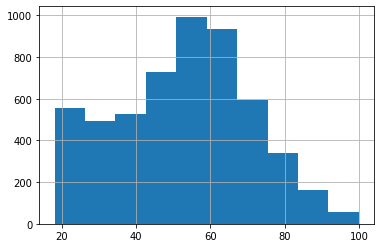

In [261]:
discount1.age.hist()

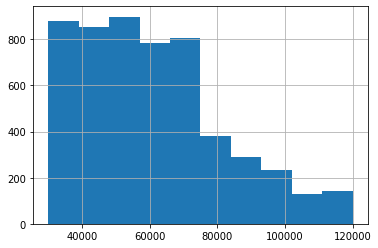

In [262]:
discount1.income.hist()

In [263]:
print('M:', np.sum(discount1['M']==1))
print('F:', np.sum(discount1['F']==1))
print('O:', np.sum(discount1['O']==1))

M: 3451
F: 1877
O: 62


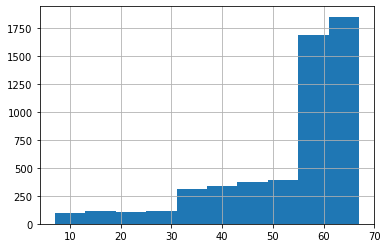

In [264]:
discount1.months_since_2013.hist()

# discount2

In [265]:
# Getting the dataframe asociated to the cluster and printing his distribution chart
discount2 = discount_users[discount_users.cluster==2]

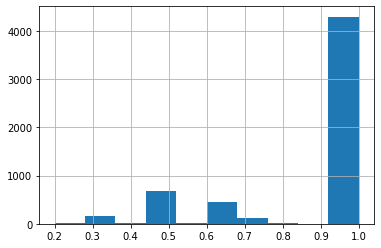

In [266]:
discount2.viewed_ratio.hist()

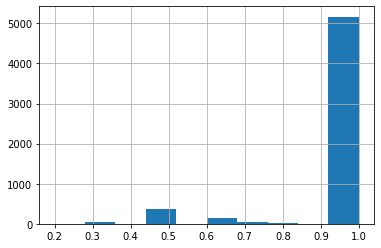

In [267]:
discount2.completed_ratio.hist()

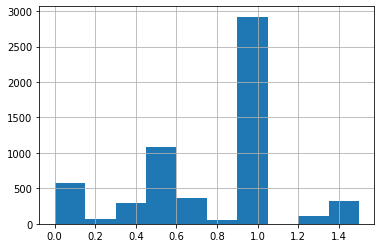

In [268]:
discount2.motivation_ratio.hist()

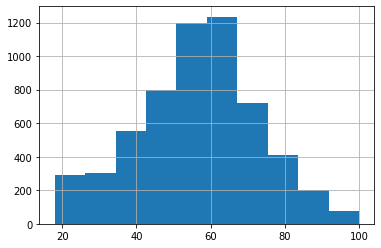

In [269]:
discount2.age.hist()

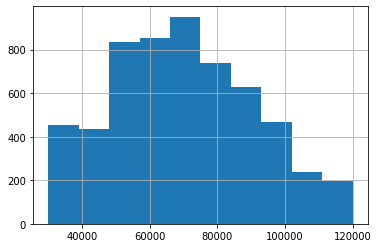

In [270]:
discount2.income.hist()

In [271]:
print('M:', np.sum(discount2['M']==1))
print('F:', np.sum(discount2['F']==1))
print('O:', np.sum(discount2['O']==1))

M: 2923
F: 2771
O: 96


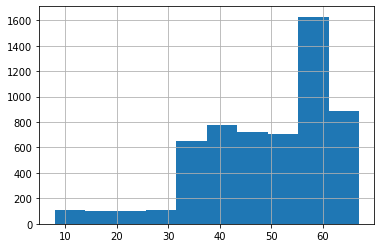

In [272]:
discount2.months_since_2013.hist()

# discount3

In [273]:
# Getting the dataframe asociated to the cluster and printing his distribution chart
discount3 = discount_users[discount_users.cluster==3]

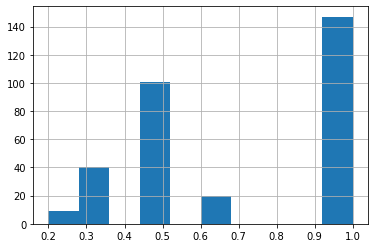

In [274]:
discount3.viewed_ratio.hist()

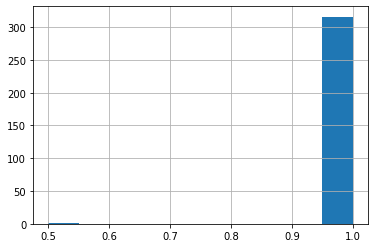

In [275]:
discount3.completed_ratio.hist()

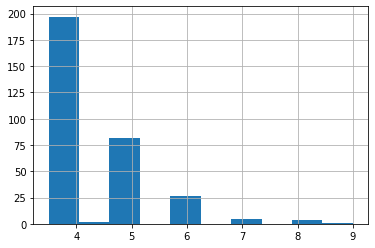

In [276]:
discount3.motivation_ratio.hist()

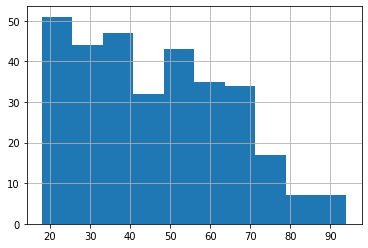

In [277]:
discount3.age.hist()

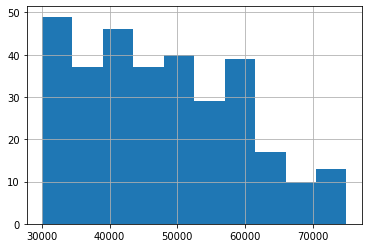

In [278]:
discount3.income.hist()

In [279]:
print('M:', np.sum(discount3['M']==1))
print('F:', np.sum(discount3['F']==1))
print('O:', np.sum(discount3['O']==1))

M: 249
F: 66
O: 2


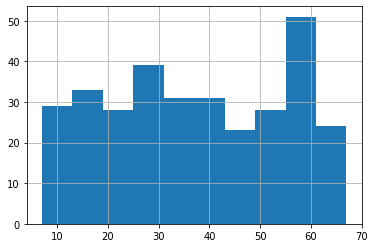

In [280]:
discount3.months_since_2013.hist()

In [308]:
# Number of discount offers viewed / discount offers 
len(offers[(offers.discount==1) & (offers.viewed_time.isnull())])/len(offers[(offers.discount==1)])

0.264806993419114

In [318]:
# Getting the percentage of the offers seen that were completed 
len(offers[(offers.discount==1) & (~offers.viewed_time.isnull()) & (~offers.completed_time.isnull())])/len(offers[(offers.discount==1) & (~offers.viewed_time.isnull())])

0.7056780227120909

## Clustering conclusion for discount offers

There are 4 clusters:

Cluster 0: People who know about the offer and complete it with 2 or 3 transactions. They are more men than women, and most of them have an income between 40K & 80K

Cluster 1: People who don't know about their offer or not was interested in buy something. (More men than women)

Cluster 2: People who know about the offer and complete it with just 1 purchase.

Cluster 3:  People who know about the offer and complete it with 4 or more purchases.

This is amazing! The discount offers are super well accepted by most of the costumers (females better than men) 70% of the users complete the offer when know about it. The suggestion here is to improve the comunication of this kind of offers because more than 25% of the offers aren´t seen by the customers.

# FINAL CONCLUSIONS

Less than 10% of the clients spent more than 200 dollars without the motivation of offers. Those probably don't need offers to keep buying. But the rest of the clients could need a little push.

That is the reason why this analysis is so important. Just to give you an idea, more than 30% of the total transactions are influenced by offers!

## There are 3 types of offers:
    - Informational
    - Discount
    - BOGO (Buy One Get One)
    
### Informational
The informational offer is the one with less impact in the users. Sadly, 89% of the users offered with this didn't buy anything.

### BOGO
The BOGO offer has much more impact than Informational, more than 50% of the offers are completed.But seems to be prefered by women rather than men.

### Discount
The Discount offers are the ones that has more impact! 70% of the offers seen were completed. This is a pretty good number, and seems to be accepted by almost for any type of user. (Also this offer has a better acceptance by women)



If the objective of the offers is to increase the increase the transactions made by the users Discount is the one to go with, followed by BOGO. Obviously the informational ones did not represents any money for the company, but also the impact is very very low. Probably another good think to analyze in the future could be which is the best way to comunicate the offers. Because this step is the reason for many incompleted offers.
